## Stationary calibration

This notebook contains the results of calibrating the 4 phones when configured next to each other with the same settings and placed next to each other in the same bookcase.

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [3]:
# For plots
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# For maps
import branca.element as bre

## Load and validate data

The first issue to note is that we actually have two specs here. The first spec is the checked in `evaluation.spec.sample`, which defines calibration for both stationary and moving instances, and some evaluation trips. However, while starting with the calibration, we noticed some inconsistencies between the power curves. So in order to be more consistent, I defined a second, calibration-only spec `examples/calibration.only.json`, which essentially repeats the calibration experiments multiple times.

After that, I returned to the first set of experiments for the moving calibration and the evaluation.

In [5]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_hf = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "sfba_hf_calibration_stationary_only")
sd_mf = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "sfba_med_freq_calibration_stationary_only")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1564345489}
response = <Response [200]>
Found 10 entries
After iterating over 10 entries, entry found
Found spec = Calibration for high frequencies only
Evaluation ran from 2019-06-12T17:00:00-07:00 -> 2019-07-30T17:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1564345490}
response = <Response [200]>
Found 10 entries
After iterating over 10 entries, entry found
Found spec = Calibration for medium frequencies only
Evaluation ran from 2019-07-17T17:00:00-07:00 -> 2019-07-28T17:00:00-07:00


In [6]:
pv_hf = eipv.PhoneView(sd_hf)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1560384000, 'end_time': 1564531200}
response = <Response [200]>
Found 82 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1560384000, 'end_time': 1564531200}
response = <Response [200]>
Found 62 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1560384000, 'end_time': 1564531200}
response = <Response [200]>
Found 62 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1560538052, 'end_time': 1560603684}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1560665721, 'end_time': 1560722362}
response = <Response [200]>
Found 14 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1560742839, 'end_time': 1560795491}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1560804485, 'end_time': 1560845900}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1560872200, 'end_time': 1560915075}
response = <Response [200]>
Fo

response = <Response [200]>
Found 28 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/battery'], 'start_time': 1560463439, 'end_time': 1560524970}
response = <Response [200]>
Found 77 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/battery'], 'start_time': 1560537988, 'end_time': 1560603597}
response = <Response [200]>
Found 64 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/battery'], 'start_time': 1560665644, 'end_time': 1560722276}
response = <Response [200]>
Found 55 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/battery'], 'start_time': 1560742774, 'end_time': 1560795420}
response = <Response [200]>
Found 75 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/battery'], 'start_time': 1560804421, 'end_time': 1560845846}
response = <Response [200]>
Found 74 entries
About

response = <Response [200]>
Found 2 entries
Retrieved 2 entries with timestamps [1560722360, 1560722361]...
About to retrieve data for ucb-sdb-android-1 from 1560742839 -> 1560795491
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/location'], 'start_time': 1560742839, 'end_time': 1560795491}
response = <Response [200]>
Found 82 entries
Retrieved 82 entries with timestamps [1560742841.409, 1560742850.525, 1560742850.54, 1560742874.517, 1560743080.425, 1560743151.553, 1560743151.614, 1560743452.558, 1560743452.616, 1560743509.576]...
About to retrieve data for ucb-sdb-android-1 from 1560795489.08 -> 1560795491
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/location'], 'start_time': 1560795489.08, 'end_time': 1560795491}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560795489.08]...
About to retrieve data for ucb-sdb-android-1 from 1560804485 -> 1560845900
About to retrieve

response = <Response [200]>
Found 65 entries
Retrieved 65 entries with timestamps [1560804507.547, 1560804516.438, 1560804516.461, 1560804541.482, 1560804573.484, 1560804773.504, 1560804817.504, 1560804817.566, 1560805118.519, 1560805118.605]...
About to retrieve data for ucb-sdb-android-2 from 1560845911.436 -> 1560845915
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1560845911.436, 'end_time': 1560845915}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560845911.436]...
About to retrieve data for ucb-sdb-android-2 from 1560872225 -> 1560915091
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1560872225, 'end_time': 1560915091}
response = <Response [200]>
Found 116 entries
Retrieved 116 entries with timestamps [1560872226.464, 1560872232.479, 1560872239.637, 1560872259.881, 1560872371.175, 1560872533.772, 1560872533.846,

response = <Response [200]>
Found 69 entries
Retrieved 69 entries with timestamps [1560872252.839, 1560872290.108, 1560872493.539, 1560872554.177, 1560872554.242, 1560872855.164, 1560872855.238, 1560872857.403, 1560872858, 1560872859]...
About to retrieve data for ucb-sdb-android-3 from 1560915105.88 -> 1560915106
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1560915105.88, 'end_time': 1560915106}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560915105.88]...
About to retrieve data for ucb-sdb-android-3 from 1560923383 -> 1560966141
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1560923383, 'end_time': 1560966141}
response = <Response [200]>
Found 68 entries
Retrieved 68 entries with timestamps [1560923385.023, 1560923397.284, 1560923419.411, 1560923613.491, 1560923685.112, 1560923685.159, 1560923694.016, 1560924001.3

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560915123.506]...
About to retrieve data for ucb-sdb-android-4 from 1560923408 -> 1560966191
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1560923408, 'end_time': 1560966191}
response = <Response [200]>
Found 88 entries
Retrieved 88 entries with timestamps [1560923410.216, 1560923444.377, 1560923650.928, 1560923711.39, 1560923711.436, 1560924000.039, 1560924012.435, 1560924012.474, 1560924211.45, 1560924333.438]...
About to retrieve data for ucb-sdb-android-4 from 1560966189.433 -> 1560966191
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1560966189.433, 'end_time': 1560966191}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560966189.433]...
About to retrieve data for ucb-sdb-android-4 from 1564291280.643 -> 1564322619.839
About to retrie

response = <Response [200]>
Found 134 entries
Retrieved 134 entries with timestamps [1564291193.324576, 1564291093.6953878, 1564291206.5595, 1564291206.685313, 1564291213.112237, 1564291513.633236, 1564291528.638197, 1564291829.141082, 1564292415.16222, 1564292430.167141]...
About to retrieve data for ucb-sdb-ios-1 from 1564322405.4268599 -> 1564322408.762954
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564322405.4268599, 'end_time': 1564322408.762954}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564322405.4268599]...
About to retrieve data for ucb-sdb-ios-2 from 1560405416 -> 1560453746
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1560405416, 'end_time': 1560453746}
response = <Response [200]>
Found 13 entries
Retrieved 13 entries with timestamps [1560405367.0704541, 1560405418.329277, 1560405418.426482, 1560405420.3993

response = <Response [200]>
Found 16 entries
Retrieved 16 entries with timestamps [1559810013.090971, 1560405438.782577, 1560405474.009579, 1560405474.0426111, 1560405477.00277, 1560405483.0016332, 1560405563.9990554, 1560405586.9990556, 1560449167.9948173, 1560453681.9862347]...
About to retrieve data for ucb-sdb-ios-3 from 1560453688.9859428 -> 1560453746
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1560453688.9859428, 'end_time': 1560453746}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560453688.9859428]...
About to retrieve data for ucb-sdb-ios-3 from 1560463469 -> 1560525005
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1560463469, 'end_time': 1560525005}
response = <Response [200]>
Found 28 entries
Retrieved 28 entries with timestamps [1559810013.090971, 1560463464.452451, 1560463470.7465482, 1560463470.799859, 15604

response = <Response [200]>
Found 13 entries
Retrieved 13 entries with timestamps [1559812342.705193, 1560463497.1730762, 1560463499.291947, 1560463499.3770561, 1560463500.9093099, 1560463501.3947077, 1560463502.0046778, 1560463503.0043554, 1560463505.0036614, 1560463599.9981084]...
About to retrieve data for ucb-sdb-ios-4 from 1560495017.9976296 -> 1560525021
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/location'], 'start_time': 1560495017.9976296, 'end_time': 1560525021}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560495017.9976296]...
About to retrieve data for ucb-sdb-ios-4 from 1560538023 -> 1560603639
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/location'], 'start_time': 1560538023, 'end_time': 1560603639}
response = <Response [200]>
Found 30 entries
Retrieved 30 entries with timestamps [1560538024.758191, 1560538025.224784, 1560538026.758208, 1560538027.4089406, 15

response = <Response [200]>
Found 8 entries
Retrieved 8 entries with timestamps [1560538053.913, 1560545229.202, 1560545229.399, 1560552714.644, 1560567515.435, 1560589401.721, 1560603677.188, 1560603677.443]...
About to retrieve data for ucb-sdb-android-1 from 1560603677.443 -> 1560603684
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1560603677.443, 'end_time': 1560603684}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560603677.443]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1560665721 -> 1560722362
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1560665721, 'end_time': 1560722362}
response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1560665722.389, 1560673249.308, 1560680394.157, 1560695427.508, 15607172

response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1560742869.126, 1560742872.784, 1560753751.484, 1560760581.218, 1560774692.174]...
About to retrieve data for ucb-sdb-android-2 from 1560774692.174 -> 1560795517
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1560774692.174, 'end_time': 1560795517}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560774692.174]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1560804506 -> 1560845915
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1560804506, 'end_time': 1560845915}
response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1560804507.526, 1560804510.23, 1560811642.5, 1560819162.843, 1560833688.654]...
About to retrieve data for ucb-sdb-andro

response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1560872252.964, 1560872255.669, 1560878719.792, 1560885928.23, 1560900383.877]...
About to retrieve data for ucb-sdb-android-3 from 1560900383.877 -> 1560915106
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1560900383.877, 'end_time': 1560915106}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560900383.877]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1560923383 -> 1560966141
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1560923383, 'end_time': 1560966141}
response = <Response [200]>
Found 19 entries
Retrieved 19 entries with timestamps [1560923385.149, 1560923388.069, 1560923697.72, 1560924015.011, 1560924318.035, 1560924617.38, 1560924920.031, 156092522

response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1560923410.19, 1560930252.674, 1560937677.046, 1560952478.147, 1560964347.151]...
About to retrieve data for ucb-sdb-android-4 from 1560964347.151 -> 1560966191
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1560964347.151, 'end_time': 1560966191}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560964347.151]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1564291280.643 -> 1564322619.839
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1564291280.643, 'end_time': 1564322619.839}
response = <Response [200]>
Found 19 entries
Retrieved 19 entries with timestamps [1564291281.053, 1564291315.076, 1564291646.083, 1564291915.422, 1564292287.142, 1564292555.523, 1564292

response = <Response [200]>
Found 12 entries
Retrieved 12 entries with timestamps [1560405428.237367, 1560405562.4057598, 1560405567.1103122, 1560405569.6041174, 1560405577.0912611, 1560405585.1918287, 1560405590.4965892, 1560453588.4923592, 1560453592.5671134, 1560453595.0597582]...
About to retrieve data for ucb-sdb-ios-2 from 1560453681.1515675 -> 1560453746
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1560453681.1515675, 'end_time': 1560453746}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560453681.1515675]...
About to retrieve data for ucb-sdb-ios-2 from 1560463439 -> 1560524970
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1560463439, 'end_time': 1560524970}
response = <Response [200]>
Found 8 entries
Retrieved 8 entries with timestamps [1560463448.5381155, 1560463476.9119039, 1560463484.7161722, 156046

response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1560538018.1481528, 1560538092.1590905, 1560538095.9791584, 1560603610.106256]...
About to retrieve data for ucb-sdb-ios-3 from 1560603610.106256 -> 1560603620
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1560603610.106256, 'end_time': 1560603620}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560603610.106256]...
About to retrieve data for ucb-sdb-ios-3 from 1560665671 -> 1560722309
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1560665671, 'end_time': 1560722309}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1560665686.8955812, 1560722252.6448345, 1560722256.4570446, 1560722304.116034]...
About to retrieve data for ucb-sdb-ios-3 from 1560722304.116034 -> 1560722309
About to retrieve messages usin

response = <Response [200]>
Found 7 entries
Retrieved 7 entries with timestamps [1560804466.4345663, 1560804477.6179862, 1560804531.6808944, 1560804535.8390136, 1560804554.0721092, 1560804559.5099487, 1560845874.505138]...
About to retrieve data for ucb-sdb-ios-4 from 1560845874.505138 -> 1560845881
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1560845874.505138, 'end_time': 1560845881}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1560845874.505138]...
About to retrieve data for ucb-sdb-ios-4 from 1560872173 -> 1560915055
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1560872173, 'end_time': 1560915055}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1560872182.5344129, 1560872211.0019293, 1560872215.1699836, 1560915038.071495]...
About to retrieve data for ucb-sdb-ios-4 from 156

response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1560665775, 'end_time': 1560722456}
response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1560742889, 'end_time': 1560795532}
response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1560804526, 'end_time': 1560845963}
response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 15608722

response = <Response [200]>
Found 38 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['statemachine/transition'], 'start_time': 1564291218.581701, 'end_time': 1564322438.768781}
response = <Response [200]>
Found 23 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['statemachine/transition'], 'start_time': 1560405472, 'end_time': 1560453746}
response = <Response [200]>
Found 47 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['statemachine/transition'], 'start_time': 1560463469, 'end_time': 1560525005}
response = <Response [200]>
Found 54 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['statemachine/transition'], 'start_time': 156053

In [8]:
pv_mf = eipv.PhoneView(sd_mf)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563408000, 'end_time': 1564358400}
response = <Response [200]>
Found 48 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563408000, 'end_time': 1564358400}
response = <Response [200]>
Found 36 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563408000, 'end_time': 1564358400}
response = <Response [200]>
Found 36 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563764613.222, 'end_time': 1563788085.749}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563863231.367, 'end_time': 1563890199.48}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563944815.921, 'end_time': 1563973553.057}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563678102.453, 'end_time': 1563699755.407}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563764643.841, 'end_time': 15637880

response = <Response [200]>
Found 47 entries
Retrieved 47 entries with timestamps [1563863232.6, 1563863346.246, 1563863401.187, 1563863537.206, 1563863648.247, 1563863949.236, 1563864068.216, 1563864250.291, 1563864518.245, 1563864551.187]...
About to retrieve data for ucb-sdb-android-1 from 1563890196.885 -> 1563890199.48
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/location'], 'start_time': 1563890196.885, 'end_time': 1563890199.48}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563890196.885]...
About to retrieve data for ucb-sdb-android-1 from 1563944815.921 -> 1563973553.057
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/location'], 'start_time': 1563944815.921, 'end_time': 1563973553.057}
response = <Response [200]>
Found 33 entries
Retrieved 33 entries with timestamps [1563944816.22, 1563944861.652, 1563944934.133, 1563945032.645, 1563945117.603, 1563945418.65,

response = <Response [200]>
Found 186 entries
Retrieved 186 entries with timestamps [1563764730.978, 1563764761.839, 1563764791.872, 1563764823.176, 1563764855, 1563764885, 1563764916, 1563764946, 1563764976, 1563764981.108]...
About to retrieve data for ucb-sdb-android-4 from 1563788109.602 -> 1563788112.969
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1563788109.602, 'end_time': 1563788112.969}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563788109.602]...
About to retrieve data for ucb-sdb-android-4 from 1563863286.928 -> 1563890220.992
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1563863286.928, 'end_time': 1563890220.992}
response = <Response [200]>
Found 44 entries
Retrieved 44 entries with timestamps [1563863287.122, 1563863292.935, 1563863401.382, 1563863535.398, 1563863594.388, 1563863895.449, 1563864086.

response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1563677975.779201, 1563677984.779201, 1563678001.4887261, 1563678001.7211242, 1563678003.4068987]...
About to retrieve data for ucb-sdb-ios-3 from 1563678003.4068987 -> 1563699728.2465448
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563678003.4068987, 'end_time': 1563699728.2465448}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563678003.4068987]...
About to retrieve data for ucb-sdb-ios-3 from 1563764533.214622 -> 1563788061.999584
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563764533.214622, 'end_time': 1563788061.999584}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1563764510.501447, 1563764533.860771, 1563764533.908111, 1563764537.0016885]...
About to retrieve data for ucb-sdb-ios-3 from 1563764537.00

response = <Response [200]>
Found 5 entries
Retrieved 5 entries with timestamps [1563944816.277, 1563944820.545, 1563951926.444, 1563958985.495, 1563973326.302]...
About to retrieve data for ucb-sdb-android-1 from 1563973326.302 -> 1563973553.057
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1563973326.302, 'end_time': 1563973553.057}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563973326.302]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1563678102.453 -> 1563699755.407
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1563678102.453, 'end_time': 1563699755.407}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1563678102.782, 1563678104.874, 1563685269.796, 1563692410.769]...
About to retrieve data for uc

response = <Response [200]>
Found 6 entries
Retrieved 6 entries with timestamps [1563863287.244, 1563870029.951, 1563874360.394, 1563877194.494, 1563887249.003, 1563889650.709]...
About to retrieve data for ucb-sdb-android-4 from 1563889650.709 -> 1563890220.992
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1563889650.709, 'end_time': 1563890220.992}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563889650.709]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1563944882.313 -> 1563973623.433
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1563944882.313, 'end_time': 1563973623.433}
response = <Response [200]>
Found 4 entries
Retrieved 4 entries with timestamps [1563944882.62, 1563944885.679, 1563952542.685, 1563959737.769]...
About to retri

response = <Response [200]>
Found 11 entries
Retrieved 11 entries with timestamps [1563678003.321509, 1563678007.982145, 1563678373.431555, 1563681602.393353, 1563685202.964268, 1563688802.940203, 1563692403.364887, 1563696004.324739, 1563699603.1209679, 1563699720.0555243]...
About to retrieve data for ucb-sdb-ios-3 from 1563699723.8841543 -> 1563699728.2465448
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1563699723.8841543, 'end_time': 1563699728.2465448}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563699723.8841543]...
About to retrieve data for ucb-sdb-ios-3 from 1563764533.214622 -> 1563788061.999584
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1563764533.214622, 'end_time': 1563788061.999584}
response = <Response [200]>
Found 11 entries
Retrieved 11 entries with timestamps [1563764540.2866454, 1563764

response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563764643.841, 'end_time': 1563788093.89}
response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563863242.745, 'end_time': 1563890205.16}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563944837.097, 'end_time': 1563973569.17}
response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], '

In [11]:
import importlib
importlib.reload(ezpv)

<module 'emeval.viz.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/viz/phone_view.py'>

This validation fails because we forgot to multiply the filter_time by 1000 before setting it.
So we set the value to 1 ms when we meant to set it to 1 sec.
This is not a super bad issue since:
- it only affects android
- due to built-in throttling the data is actually returned only at 1sec frequency or even less anyway
- we don't use this to model anything else, we just use it to help choose regimes for further testing, and for checking that the drain is consistent

We had fixed this bug before the medium frequency collection (phew!) so that does validate properly

In [12]:
# pv_hf.validate()
pv_mf.validate()

-------------------- About to validate calibration settings --------------------
Processing data for android phones
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['config/sensor_config'], 'start_time': 1563678069.847, 'end_time': 1563699745.856}
response = <Response [200]>
Found 1 entries
best_high_accuracy_medium_freq_stationary_0 -> [100]
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['config/sensor_config'], 'start_time': 1563764613.222, 'end_time': 1563788085.749}
response = <Response [200]>
Found 1 entries
best_high_accuracy_medium_freq_stationary_1 -> [100]
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['config/sensor_config'], 'start_time': 1563863231.367, 'end_time': 1563890199.48}
response = <Response [200]>
Found 2 entries
100m_balanced_accuracy_medium_freq_stationary_0 -> [102, 105]
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['config/sensor_config'], 'start_

response = <Response [200]>
Found 2 entries
100m_balanced_accuracy_medium_freq_stationary_1 -> [100, 3000]
-------------------- About to validate evaluation settings --------------------
-------------------- About to validate calibration range durations --------------------
Processing data for android phones
Processing data for ios phones
                           100m_balanced_accuracy_medium_freq_stationary_0  \
android_ucb-sdb-android-1                                     26968.113000   
android_ucb-sdb-android-2                                     26962.415000   
android_ucb-sdb-android-3                                     26942.114000   
android_ucb-sdb-android-4                                     26934.064000   
ios_ucb-sdb-ios-1                                             26969.449777   
ios_ucb-sdb-ios-2                                             26967.322450   
ios_ucb-sdb-ios-3                                             26967.096922   
ios_ucb-sdb-ios-4                  

In [13]:
ev_hf = eiev.EvaluationView()
ev_hf.from_view_multiple_runs(pv_hf, "")

Processing data for android phones
Processing data for ios phones


In [14]:
ev_mf = eiev.EvaluationView()
ev_mf.from_view_multiple_runs(pv_mf, "")

Processing data for android phones
Processing data for ios phones


## Visualize battery drain

### Basic visualization

Dump everything into one giant graph

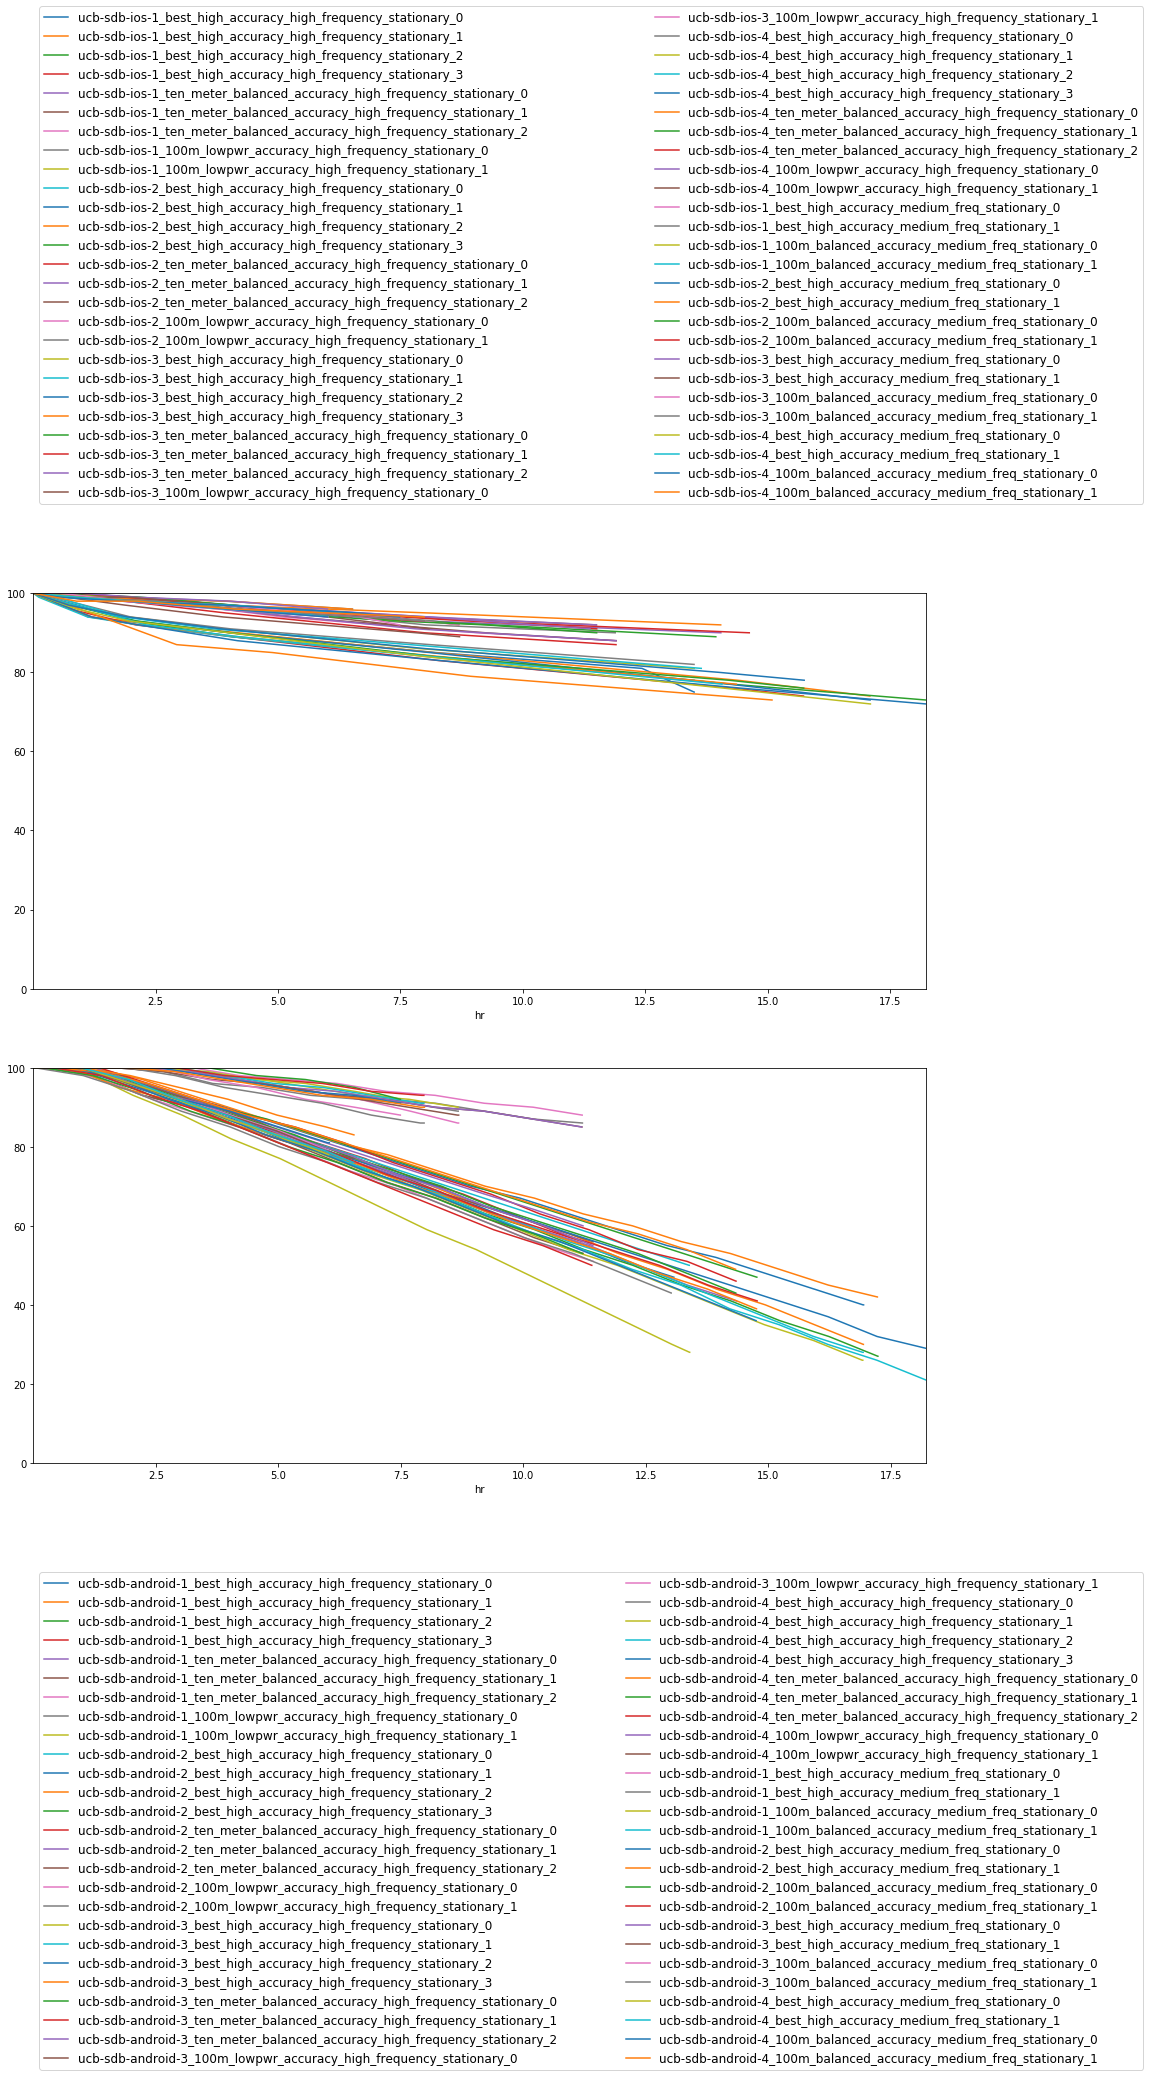

In [27]:
(ifig, [android_ax, ios_ax]) = plt.subplots(ncols=1, nrows=2, figsize=(16,16))

ezpv.plot_all_power_drain(ios_ax, pv_hf.map()["ios"], "calibration", "stationary")
ezpv.plot_all_power_drain(ios_ax, pv_mf.map()["ios"], "calibration", "stationary")
ios_ax.legend(loc="upper left", mode="expand", bbox_to_anchor=(0, 3.5, 1.25,0.2), ncol=2, prop={"size": 12})
ezpv.plot_all_power_drain(android_ax, pv_hf.map()["android"], "calibration", "stationary")
ezpv.plot_all_power_drain(android_ax, pv_mf.map()["android"], "calibration", "stationary")
android_ax.legend(loc="lower left", mode="expand", bbox_to_anchor=(0,-2.75,1.25,0.2), ncol=2, prop={"size": 12})

### Grouped by sensing configuration

If the previous graph is too busy, this graph groups the values from similar experiments together so that we can see whether they separate out or not. We can clearly see two clusters of lines for both android and iOS.

- For android, the only really high power mode is high frequency high accuracy. Lowering either the frequency (e.g. `best_high_accuracy_medium_freq_stationary` or the accuracy `100m_balanced_accuracy_medium_freq_stationary`) makes the power significantly different and by about the same value.
- For iOS, the the frequency does not seem to make any difference. The only variation is caused by lowering the accuracy to 100m

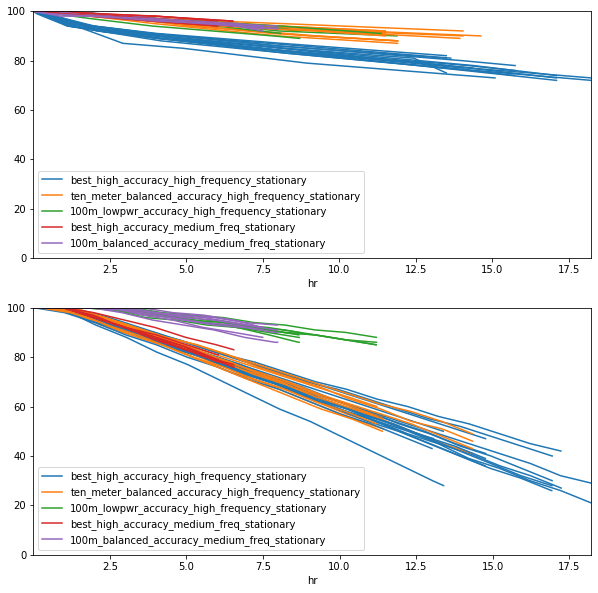

In [31]:
(ifig, [android_ax, ios_ax]) = plt.subplots(ncols=1, nrows=2, figsize=(10,10))

color_map = {}
legend_map = {}

(color_map, legend_map) = ezpv.plot_collapsed_all_power_drain(ios_ax, pv_hf.map()["ios"], "calibration", "stationary", color_map, legend_map)
(color_map, legend_map) = ezpv.plot_collapsed_all_power_drain(ios_ax, pv_mf.map()["ios"], "calibration", "stationary", color_map, legend_map)
(color_map, legend_map) = ezpv.plot_collapsed_all_power_drain(android_ax, pv_hf.map()["android"], "calibration", "stationary", color_map, legend_map)
(color_map, legend_map) = ezpv.plot_collapsed_all_power_drain(android_ax, pv_mf.map()["android"], "calibration", "stationary", color_map, legend_map)
ios_ax.legend(legend_map.values(), legend_map.keys())
android_ax.legend(legend_map.values(), legend_map.keys())

### Separate plots to see individual variations

In case we want to see individual variations in a less overwhelming way, we can plot the individual runs in separate plots.

#### Phone based plots

Printing 1 nRows for calibration, pattern stationary
Printing 1 nRows for calibration, pattern stationary


/Users/shankari/e-mission/e-mission-eval-public-data/emeval/viz/phone_view.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(nRows, ncols, i+1, title=phone_label, label=phone_label)


Printing 1 nRows for calibration, pattern stationary
Printing 1 nRows for calibration, pattern stationary


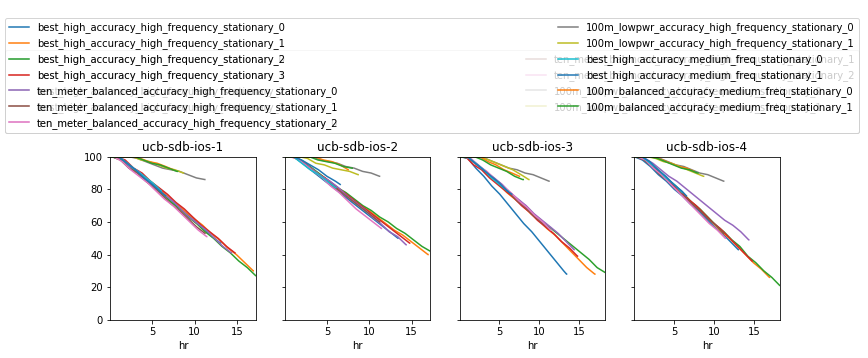

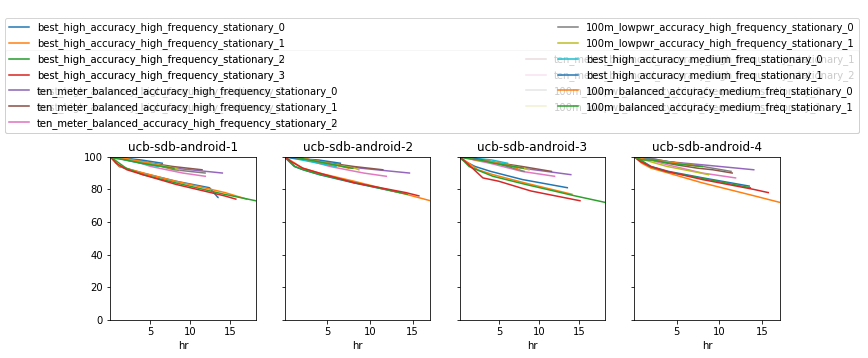

In [33]:
(ifig, ax) = plt.subplots(figsize=(12,3), nrows=0, ncols=0)
ezpv.plot_separate_power_drain(ifig, pv_hf.map()["ios"], 4, "calibration", "stationary")
ezpv.plot_separate_power_drain(ifig, pv_mf.map()["ios"], 4, "calibration", "stationary")
(ifig, ax) = plt.subplots(figsize=(12,3), nrows=0, ncols=0)
ezpv.plot_separate_power_drain(ifig, pv_hf.map()["android"], 4, "calibration", "stationary")
ezpv.plot_separate_power_drain(ifig, pv_mf.map()["android"], 4, "calibration", "stationary")

In [94]:
importlib.reload(ezev)

<module 'emeval.viz.eval_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/viz/eval_view.py'>

#### Experiment based plots

Handling data for run best_high_accuracy_high_frequency_stationary_0
Handling data for run best_high_accuracy_high_frequency_stationary_1
Handling data for run best_high_accuracy_high_frequency_stationary_2
Handling data for run best_high_accuracy_high_frequency_stationary_3
Handling data for run ten_meter_balanced_accuracy_high_frequency_stationary_0
Handling data for run ten_meter_balanced_accuracy_high_frequency_stationary_1
Handling data for run ten_meter_balanced_accuracy_high_frequency_stationary_2
Handling data for run 100m_lowpwr_accuracy_high_frequency_stationary_0
Handling data for run 100m_lowpwr_accuracy_high_frequency_stationary_1


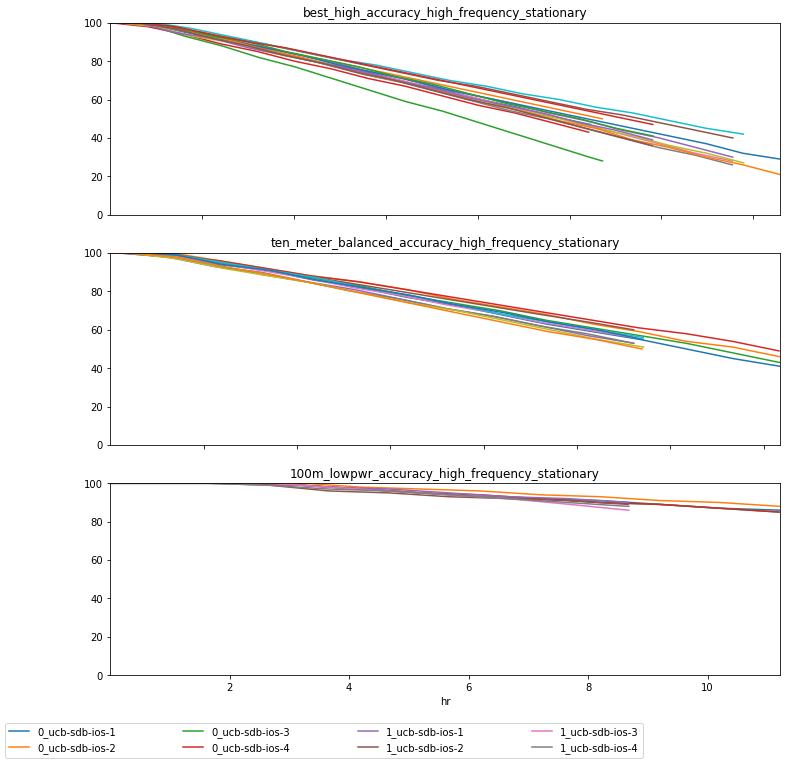

In [95]:
(ifig, ax) = plt.subplots(figsize=(12,12), nrows=0, ncols=0)
ezev.plot_separate_power_drain_multiple_runs(ifig, 1, ev_hf.map("calibration")["ios"], "")

Handling data for run best_high_accuracy_medium_freq_stationary_0
Handling data for run best_high_accuracy_medium_freq_stationary_1
Handling data for run 100m_balanced_accuracy_medium_freq_stationary_0
Handling data for run 100m_balanced_accuracy_medium_freq_stationary_1


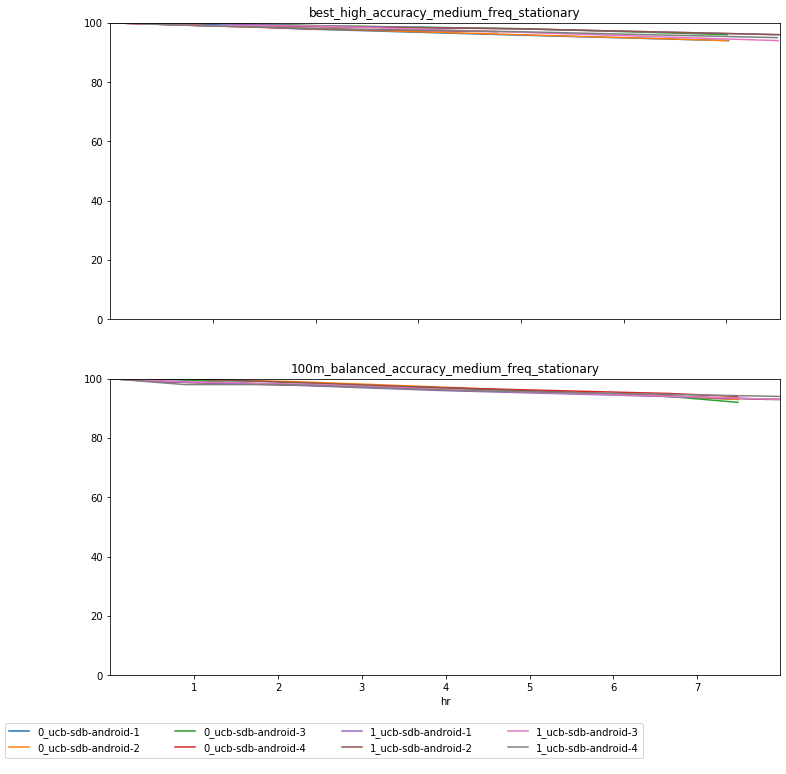

In [96]:
(ifig, ax) = plt.subplots(figsize=(12,12), nrows=0, ncols=0)
ezev.plot_separate_power_drain_multiple_runs(ifig, 1, ev_mf.map("calibration")["android"], "")

## Checking counts

We now check the number of data points collected during calibration and their distribution in an effort to validate the duty cycling. Observations from this are:

##### on android: more points = more power drain

As we would expect, the number of points across the various phones and the various runs is almost identical. In the cases where it is significantly different (e.g. `high-accuracy-stationary-0` on `ucb-sdb-android-1` and `high-accuracy-stationary-3` on `ucb-sdb-android-3`), we have see significant differences in the power drain as well. However, we do not understand why these two runs behave differently from the other runs.

##### on iOS: almost no points

Since iOS has a distance filter, and not a time filter, and this calibration was stationary, almost no points are generated for high accuracy sensing. However, with the 100m sensing, we do get a significant number of points (an order of magnitude more), although nowhere near the number of entries on android.

##### on android: medium accuracy = almost no points

On android, medium accuracy sensing generates two orders of magnitude fewer points than high accuracy. So the additional power drain on android probably reflects not just the sensing cost but also the processing cost. This also indicates that the medium accuracy sensing, which relies on WiFi and cellular signal strengths, is likely to be suspended when the phone is in doze mode.

In [89]:
hf_count_df = ezpv.get_count_df(pv_hf); hf_count_df

Processing data for android phones
Processing data for ios phones


,100m_lowpwr_accuracy_high_frequency_stationary_0,100m_lowpwr_accuracy_high_frequency_stationary_1,best_high_accuracy_high_frequency_stationary_0,best_high_accuracy_high_frequency_stationary_1,best_high_accuracy_high_frequency_stationary_2,best_high_accuracy_high_frequency_stationary_3,ten_meter_balanced_accuracy_high_frequency_stationary_0,ten_meter_balanced_accuracy_high_frequency_stationary_1,ten_meter_balanced_accuracy_high_frequency_stationary_2
android_ucb-sdb-android-1,65,53,9848,6615,6065,7661,82,67,93
android_ucb-sdb-android-2,57,39,6096,6853,6801,6801,90,65,116
android_ucb-sdb-android-3,68,41,5206,6788,7385,10527,64,59,69
android_ucb-sdb-android-4,88,116,5504,6572,5723,6488,73,127,72
ios_ucb-sdb-ios-1,192,134,8,18,11,13,18,15,19
ios_ucb-sdb-ios-2,319,258,13,13,13,10,8,15,11
ios_ucb-sdb-ios-3,418,251,16,28,10,12,12,12,10
ios_ucb-sdb-ios-4,292,352,15,13,30,14,84,11,16


In [90]:
mf_count_df = ezpv.get_count_df(pv_mf); mf_count_df

Processing data for android phones
Processing data for ios phones


,100m_balanced_accuracy_medium_freq_stationary_0,100m_balanced_accuracy_medium_freq_stationary_1,best_high_accuracy_medium_freq_stationary_0,best_high_accuracy_medium_freq_stationary_1
android_ucb-sdb-android-1,47,33,176,168
android_ucb-sdb-android-2,64,38,168,169
android_ucb-sdb-android-3,46,43,2,177
android_ucb-sdb-android-4,44,35,184,186
ios_ucb-sdb-ios-1,9,4,5,2
ios_ucb-sdb-ios-2,8,3,5,4
ios_ucb-sdb-ios-3,9,2,5,4
ios_ucb-sdb-ios-4,8,5,4,6


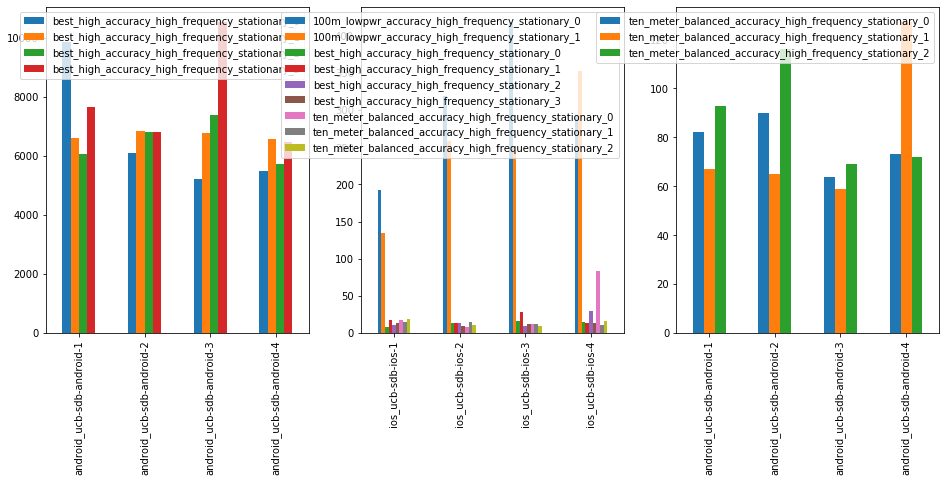

In [91]:
(ifig, ax) = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
hf_count_df.filter(like="best_high_accuracy").filter(like="android", axis=0).plot(ax=ax[0],kind="bar")
hf_count_df.filter(like="ios", axis=0).plot(ax=ax[1],kind="bar")
hf_count_df.filter(like="ten_meter_balanced").filter(like="android", axis=0).plot(ax=ax[2],kind="bar")

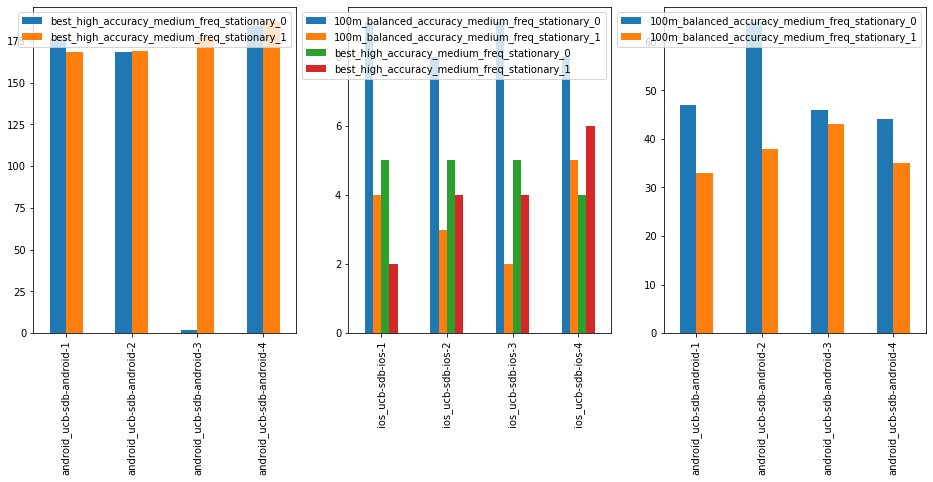

In [92]:
(ifig, ax) = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
mf_count_df.filter(like="best_high_accuracy").filter(like="android", axis=0).plot(ax=ax[0],kind="bar")
mf_count_df.filter(like="ios", axis=0).plot(ax=ax[1],kind="bar")
mf_count_df.filter(like="100m_balanced").filter(like="android", axis=0).plot(ax=ax[2],kind="bar")

## Checking densities